# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


# Import path and dataframe

In [2]:
# Importing path

path = r'/Users/heatherstewart/Dropbox/Mac/Desktop/Instacart Basket analysis 3'

In [3]:
# Calling path

path

'/Users/heatherstewart/Dropbox/Mac/Desktop/Instacart Basket analysis 3'

In [5]:
# Importing df_combo_all dataframe

df_combo_all = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_combo_small.pkl'))

In [6]:
df_combo_all.head()

,customer_id,first_name,sirname,gender,state,customer_age,date_joined,n_dependants,fam_status,income,...,prices,_merge,price_range_loc,Busiest days,max_order,loyalty_flag,average_price,spending_flag,regularity,order_frequency_flag
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,both,Mid_range product,Regularly busy,8,New customer,102727.771831,High spender,20.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,both,Mid_range product,Busiest days,8,New customer,102727.771831,High spender,20.0,Regular customer
7,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,both,Mid_range product,Regularly busy,8,New customer,103056.699960,High spender,20.0,Regular customer
9,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,both,Low_range product,Regularly busy,8,New customer,102591.397624,High spender,20.0,Regular customer
11,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,4.3,both,Low_range product,Busiest days,8,New customer,102591.397624,High spender,20.0,Regular customer


# Creating histogram chart

#Step 3: Create a histogram of the "order_hour_of_day" column to provide senior stakeholders with descriptive findings about sales.

In [7]:
df_combo_all['order_hour_of_day'].max()

'Average orders'

<Axes: xlabel='order_hour_of_day'>

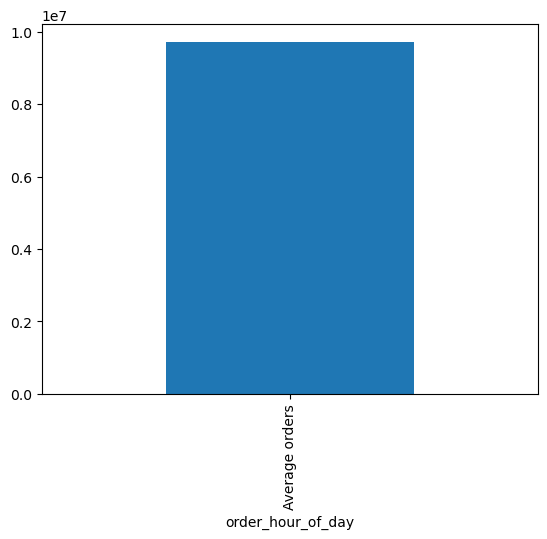

In [8]:
df_combo_all['order_hour_of_day'].value_counts().plot.bar(3)

## The graph demonstrates that the average_hour is the most common time to shop. 

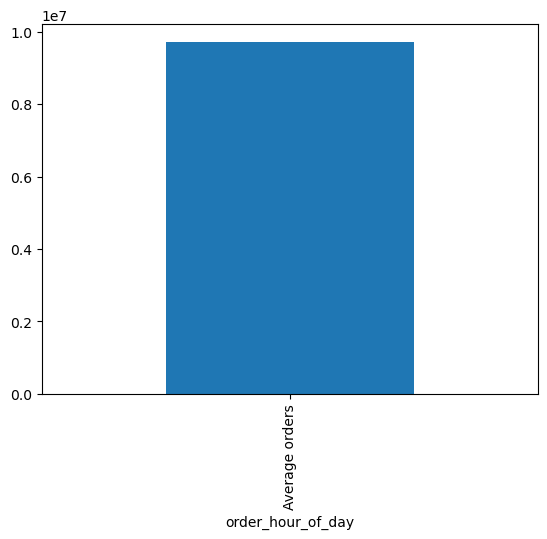

In [9]:
# Saving bar visualization to Jupyter

bar = df_combo_all['order_hour_of_day'].value_counts().plot.bar(3)

In [10]:
# Using .loc() to cap prices >100 

df_combo_all.loc[df_combo_all['prices']>100, 'prices']=np.nan

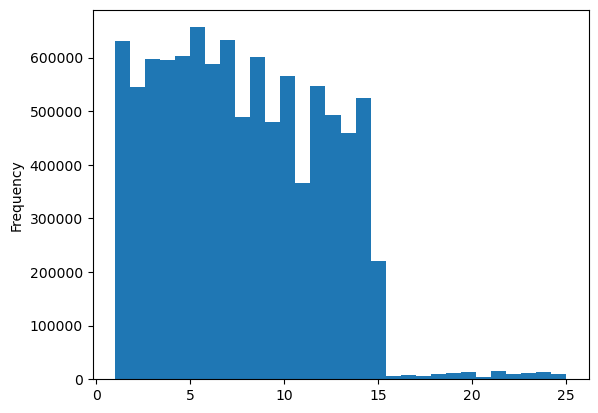

In [11]:
# Creating histogram chart

hist = df_combo_all['prices'].plot.hist(bins = 30)

#We can see that most "prices" ranges between $1 and $15 with some prices ranging between $15 and $25.
The highest prices are ~$8 and $13. 

In [12]:
#Saving histogram visualization to Jupyter

hist = df_combo_all['order_hour_of_day'].value_counts().plot.hist

# Create a bar chart

In [13]:
# Step 4: Creating a bar chart

#The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag column. 

<Axes: xlabel='loyalty_flag'>

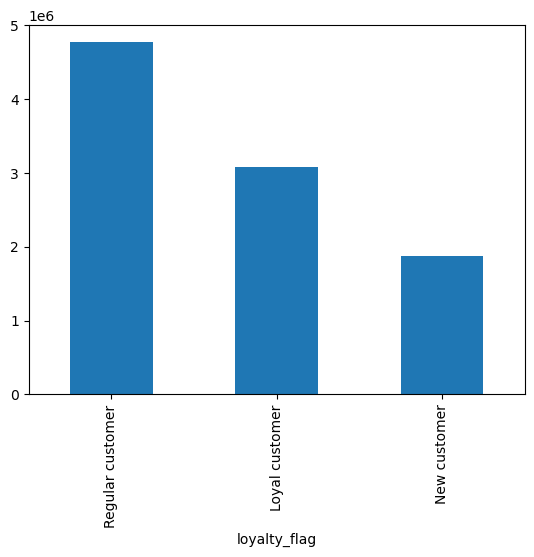

In [14]:
# Using plot.bar() to create bar chart

df_combo_all['loyalty_flag'].value_counts().plot.bar()

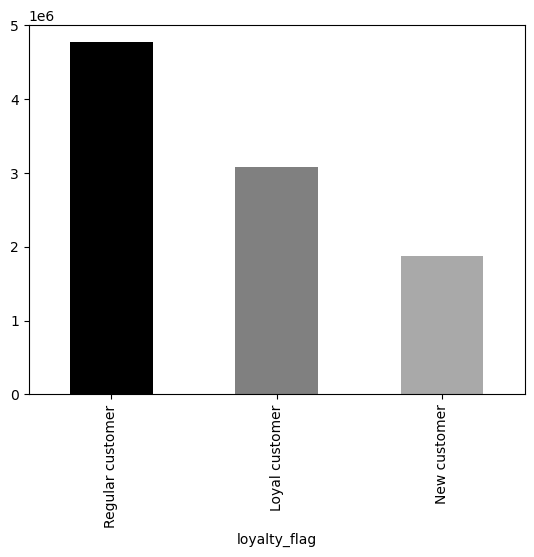

In [15]:
# Saving bar as visualization to Jupyter

bar2 = df_combo_all['loyalty_flag'].value_counts().plot.bar(color =['black','grey','darkgrey'])

## Using accurate sample for line chart

#Step 5: Check whether there's a difference in expenditure( the "prices" column) depending on the hour of the day.

## creating a random sample of dataframe

In [16]:
#Splitting the dataframe

np.random.seed(4)
dev = np.random.rand(len(df_combo_all))<=0.7


In [17]:
big = df_combo_all[dev]

In [18]:
small = df_combo_all[~dev]

In [19]:
df_2 = small[['order_hour_of_day','prices']]

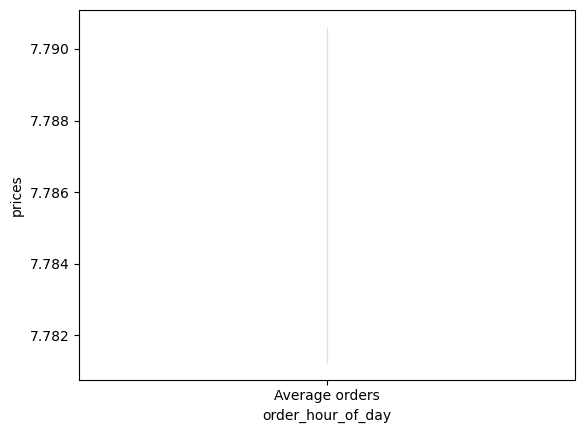

In [20]:
#Step 5: Creating line chart by using sns.lineplot()function.

line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y ='prices')

## Create a line graph

## Step 6: Determine if therd's a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [21]:
df_3 = small [['customer_age', 'n_dependants']]

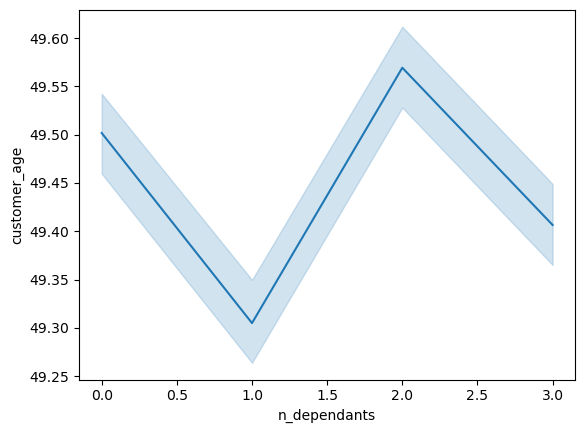

In [22]:
# Using sns.lineplot to create line chart

line = sns.lineplot(data = df_3, x = 'n_dependants', y = 'customer_age')

## There is a positive correlation between age and number of dependants. Individuals below 49. 50 has no dependants, families with individuals whose ages are 49.55 have  2 dependants, 49.30 has 1 dependant, and 49. 40 has 3 dependants.  

## Creating scatterplot

# Step 7: Create a scatterplot to show relationship between age and spending power. 

In [23]:

df_4 = small [['income', 'customer_age']]

<Axes: xlabel='customer_age', ylabel='income'>

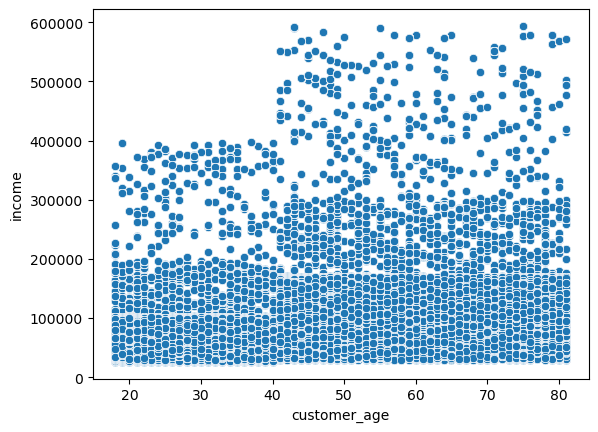

In [24]:
sns.scatterplot(x = 'customer_age', y = 'income', data = df_4)

##The scatterplot shows income ranges between $0 and $60,000, with the largest percentage earning between $0 to $20,000. However, some individual between the ages of ~45 and 80 have income ranging from $30,000 to $60,000. These individuals make up a smaller percentage of the income demographic.   

# Exporting Graphs

In [25]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_combo.png'))

In [26]:
bar2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar2_combo.png'))